In [367]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="ticks")

In [368]:
# 2a

df = pd.read_csv("winequality-red.csv", delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


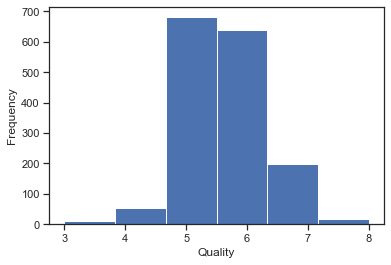

The range is :  5


In [369]:
# 2b

# Histogram
plt.hist(df["quality"], bins =6,)
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.show()

# calculating the range
q_max = df["quality"].max()
q_min = df["quality"].min()
range = q_max - q_min
print("The range is : ", range)

In [370]:
# 2c
#bins
bins = np.linspace(min(df["quality"]), max(df["quality"]), 4)

group_names = ['low', 'medium', 'high']

df["quality bin"] = pd.cut(df["quality"], bins, labels=group_names, include_lowest=True )

# Drop the column "quality"
df.drop(["quality"], axis =1, inplace =True)
df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality bin
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,medium
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,medium
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,medium
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,medium
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,medium
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,medium
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,medium
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,high
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,high
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,medium


In [371]:
# 2 d
medium_omitted =df[df["quality bin"]=="medium"].index

# drop rows with quality bin value = medium
df.drop(medium_omitted, inplace=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality bin
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,high
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,high
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,high
18,7.4,0.59,0.08,4.4,0.086,6.0,29.0,0.9974,3.38,0.50,9.0,low
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.9968,3.23,0.73,9.7,high


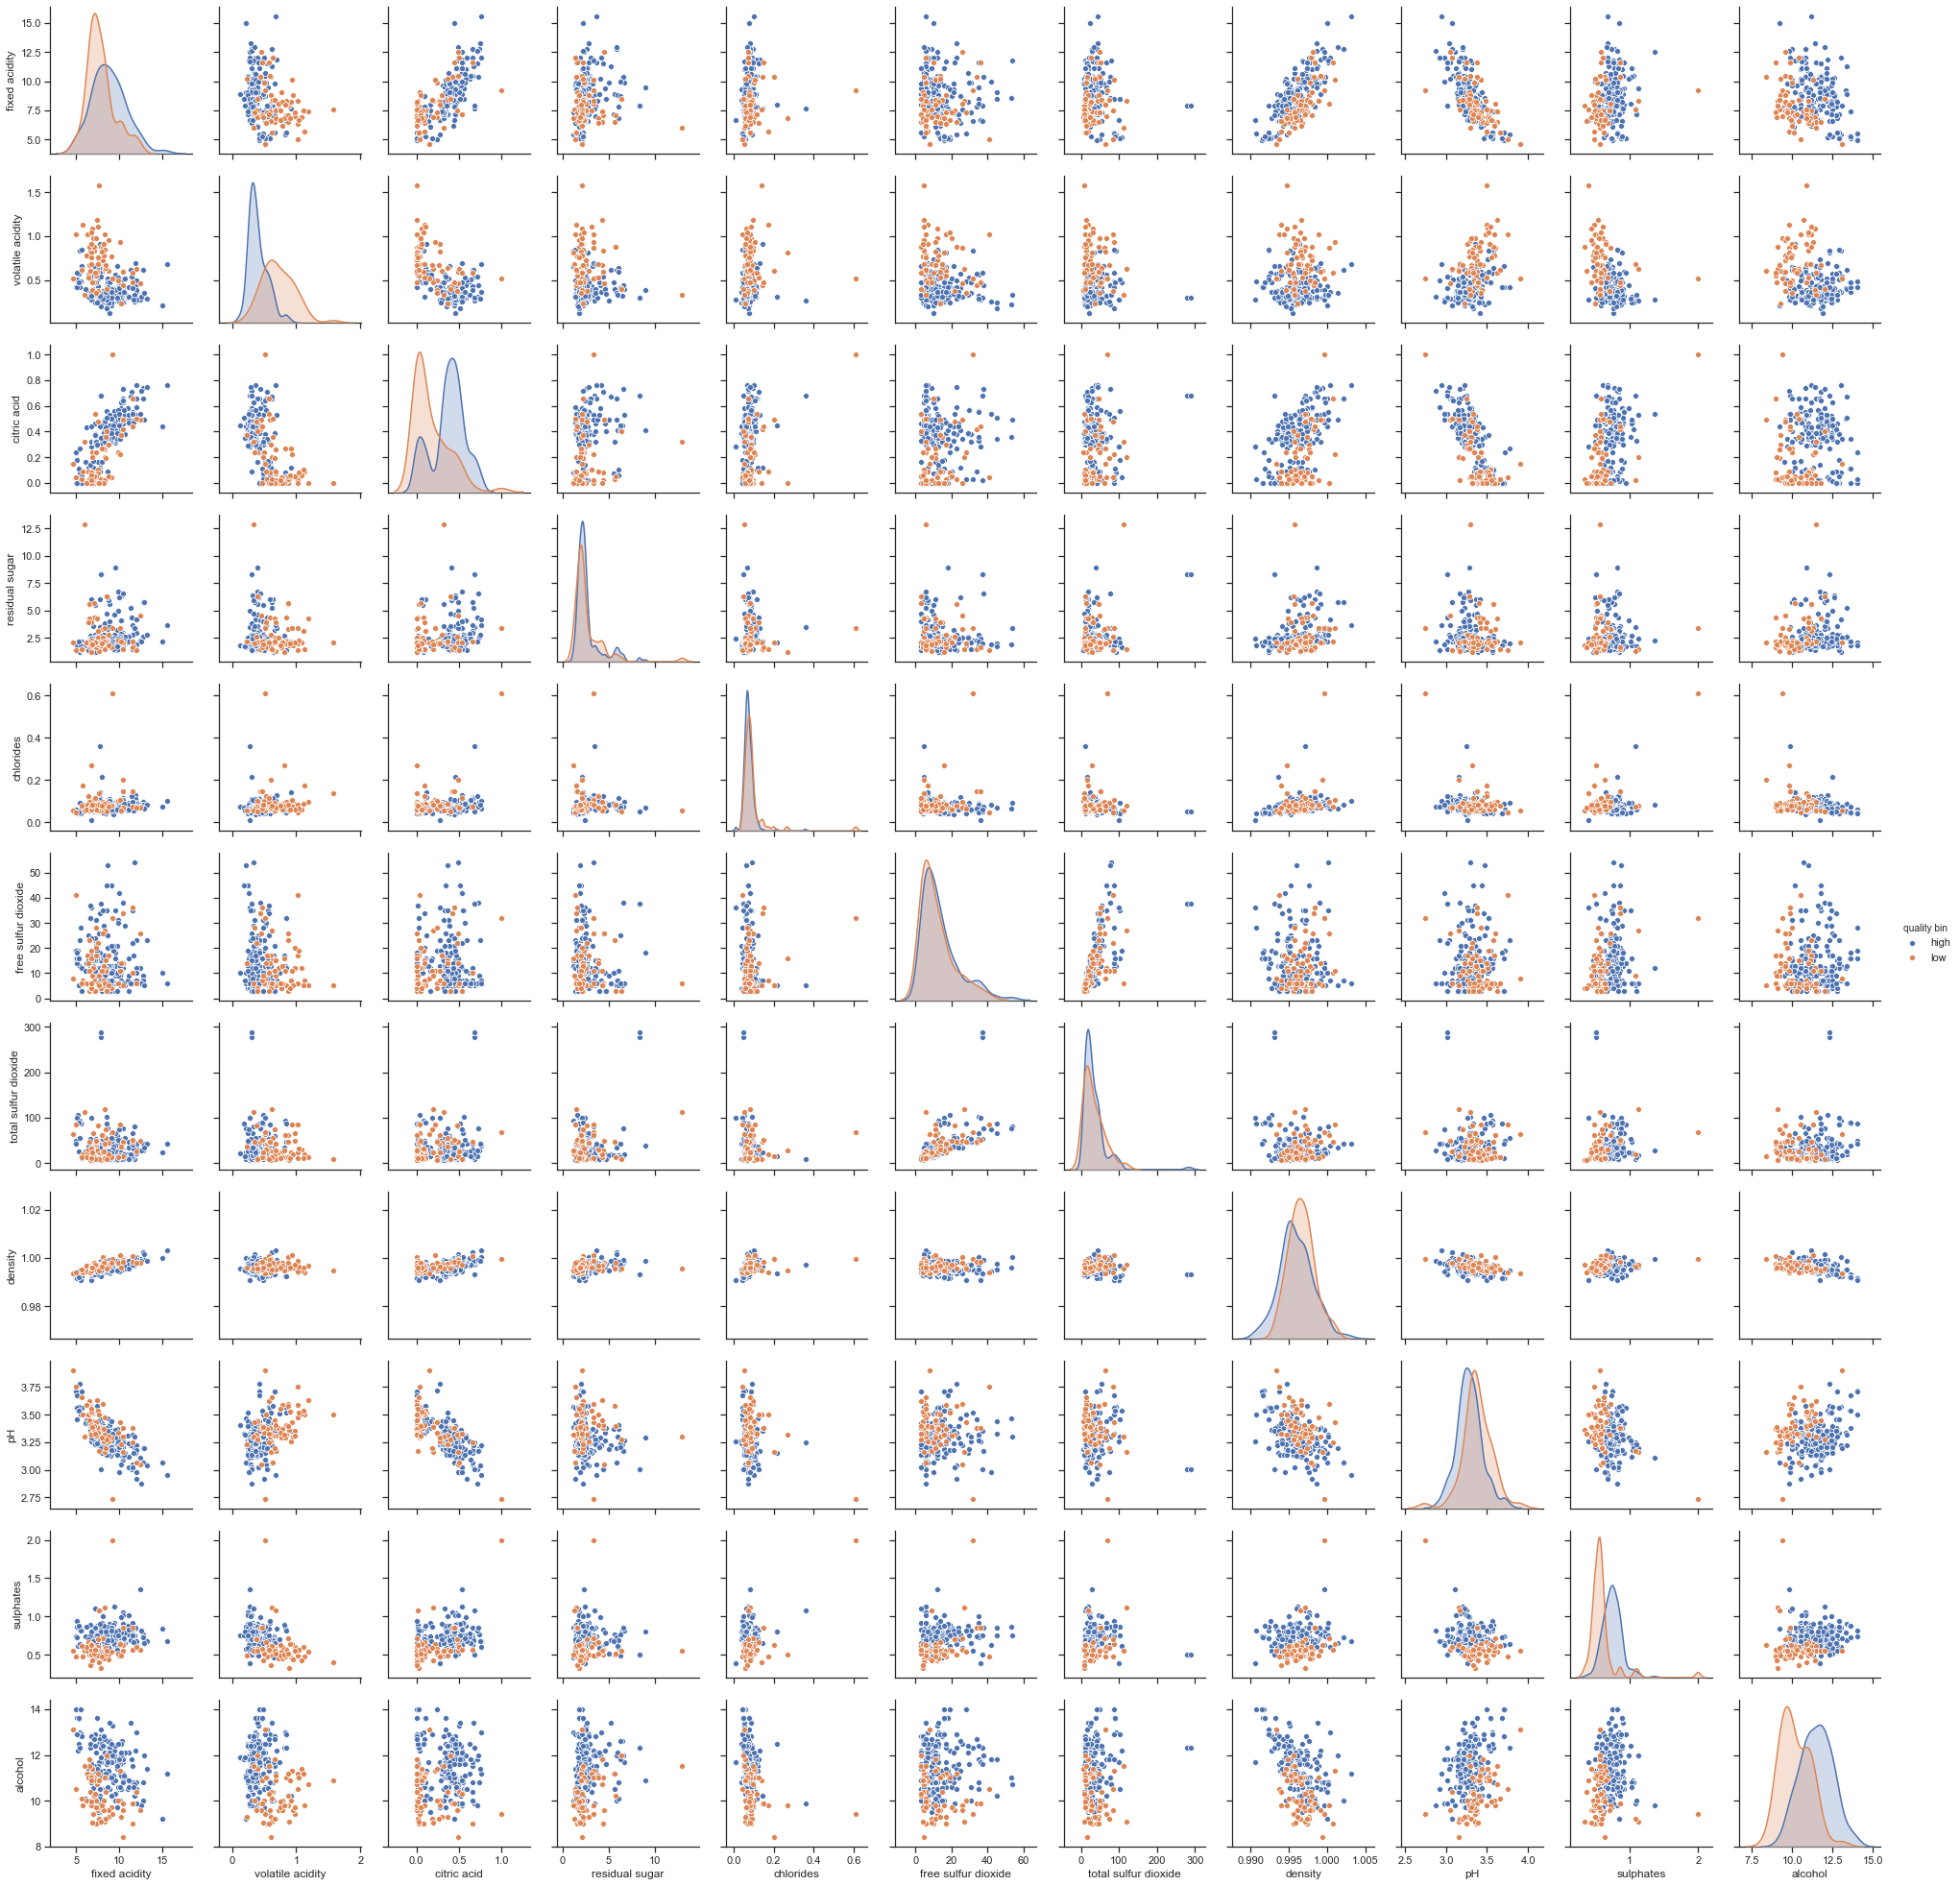

In [372]:
# 2e
ax = sns.pairplot(df, hue="quality bin",hue_order =["high", "low"], height = 2.5)

In [373]:
# 2f
#Alcohol, sulphates, citric acid, volatile acidity,pH


In [376]:
# 2g

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif

X = df.iloc[:,0:11]
y =df.iloc[:,-1]

f_classif = SelectKBest(score_func=f_classif, k=5)
fit = f_classif.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Attributes','Score']  #naming the dataframe columns

# Vis as featureScore:
featureScores

,Attributes,Score
0,fixed acidity,12.510219
1,volatile acidity,165.055077
2,citric acid,51.554562
3,residual sugar,0.013170
4,chlorides,10.152368
5,free sulfur dioxide,1.800605
6,total sulfur dioxide,0.009867
7,density,4.828331
8,pH,17.481527
9,sulphates,44.345633


In [377]:
featureScores.nlargest(5,'Score')  #print 5 best features

,Attributes,Score
1,volatile acidity,165.055077
10,alcohol,86.049453
2,citric acid,51.554562
9,sulphates,44.345633
8,pH,17.481527


In [378]:
# Yes

In [379]:
df = df[[ "volatile acidity","citric acid","pH","sulphates", "alcohol","quality bin"]]
df.head()

,volatile acidity,citric acid,pH,sulphates,alcohol,quality bin
7,0.65,0.00,3.39,0.47,10.0,high
8,0.58,0.02,3.36,0.57,9.5,high
16,0.28,0.56,3.30,0.75,10.5,high
18,0.59,0.08,3.38,0.50,9.0,low
37,0.38,0.28,3.23,0.73,9.7,high


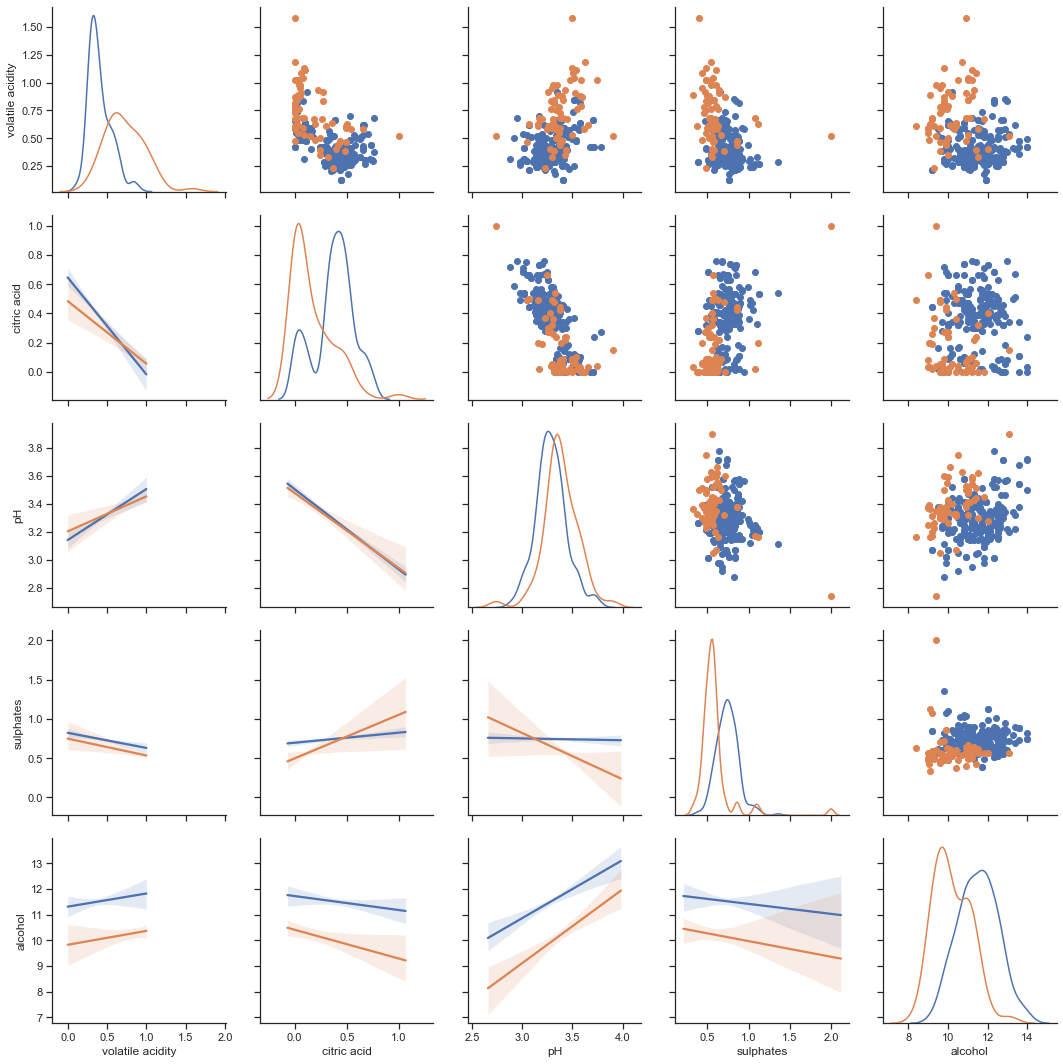

In [380]:
# 2h
ax = sns.PairGrid(df, hue ="quality bin",hue_order =["high","low"],diag_sharey=False,height = 3)
ax.map_upper(plt.scatter)
ax.map_lower(sns.regplot, scatter = False)
ax.map_diag(sns.kdeplot, legend=False)

In [382]:
# 2i
# There is a strong Negative correlation between pH and citric acidity

# Yes, sulphates has multimodal distribution